In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 11.5 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
stocks = input("Enter the code of Stock :- ")
data = yf.download(stocks,"2008-01-01","2022-06-05",auto_adjust=True)
# data.head()
data.tail()

Enter the code of Stock :- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2022-05-27,8.811,8.895,8.285,8.727,107093
2022-05-31,8.874,8.916,8.118,8.145,125484
2022-06-01,8.271,8.791,8.146,8.696,111962
2022-06-02,8.783,9.057,8.377,8.485,119011
2022-06-03,8.412,8.693,8.267,8.523,75228


In [ ]:
data.shape

(3631, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3631 entries, 2008-01-02 to 2022-06-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3631 non-null   float64
 1   High    3631 non-null   float64
 2   Low     3631 non-null   float64
 3   Close   3631 non-null   float64
 4   Volume  3631 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 170.2 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000
mean,3.777485,3.858590,3.694838,3.772981,131273.573396
std,1.814865,1.857525,1.770603,1.812205,54434.380186
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.715000,2.759000,2.664000,2.714500,92065.000000
50%,3.328000,3.396000,3.262000,3.327000,126492.000000
75%,4.237500,4.334500,4.154500,4.247500,161569.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


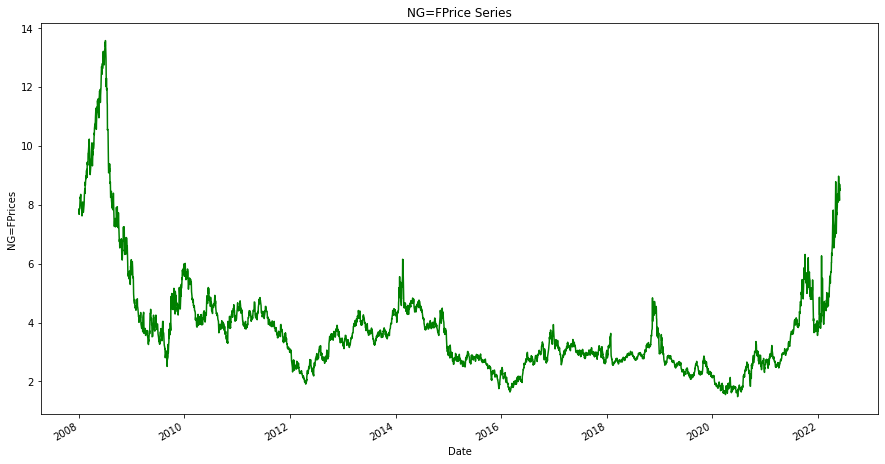

In [ ]:
data.Close.plot(figsize=(15,8),color='g')
plt.ylabel("{}Prices".format(stocks))
plt.title("{}Price Series".format(stocks))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


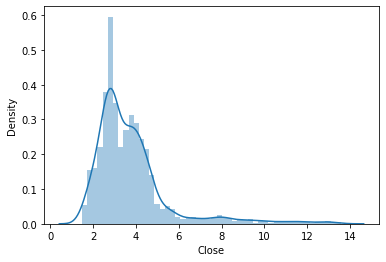

In [ ]:
sns.distplot(data["Close"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


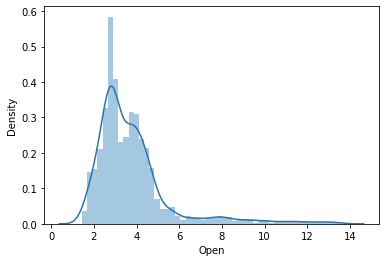

In [ ]:
sns.distplot(data["Open"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


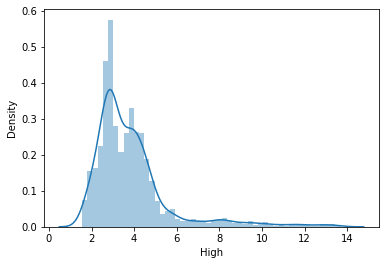

In [ ]:
sns.distplot(data["High"])

In [ ]:
X = data.drop("Close",axis=1)
y = data["Close"] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 4)
(727, 4)
(2904,)
(727,)


In [ ]:
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()
 lr.fit(X_train,y_train)
 pred1 = lr.predict(X_test)

In [ ]:
 pred1.shape

(727,)

In [ ]:
from sklearn.metrics import mean_squared_error ,r2_score

def calculate_metrics(y_test,y_pred):
  mse = mean_squared_error(y_test,y_pred)
  rmse= np.sqrt(mse)
  rse = r2_score(y_test,y_pred)
  print("MSE :- ",mse)
  print("RMSE :- ",rmse)
  print("R2_score :- ",rse)

calculate_metrics(y_test,pred1)

MSE :-  0.002212549425237534
RMSE :-  0.0470377446869802
R2_score :-  0.9992485576063007


In [ ]:
 from sklearn.linear_model import Lasso, Ridge 

 la = Lasso().fit(X_train, y_train )
 ri = Ridge().fit(X_train, y_train ) 

 la_p = la.predict(X_test) 
 ri_p = ri.predict(X_test)

In [ ]:
 calculate_metrics(y_test, la_p)

MSE :-  0.27524327356724404
RMSE :-  0.5246363250550271
R2_score :-  0.9065198444926095


In [ ]:
 calculate_metrics(y_test, ri_p)

MSE :-  0.0023843011789633317
RMSE :-  0.048829306558288654
R2_score :-  0.9991902260058991


In [ ]:
 from sklearn.svm import SVR 
 from sklearn.model_selection import GridSearchCV 

 svr = SVR() 

 param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

 grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
 grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.051 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.084 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.061 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.046 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.051 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.083 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.049 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.060 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.046 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.051 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 


In [ ]:
svr_pred

array([3.82100426, 3.82100148, 3.82100148, 3.82100148, 3.82100148,
       2.77611202, 3.78360649, 3.82100148, 3.82099907, 3.78369983,
       3.82094917, 3.82100148, 3.8915543 , 3.51026954, 4.9102556 ,
       3.82100148, 3.81908705, 3.82100148, 2.44522125, 3.82100148,
       3.70894422, 3.87814957, 3.12424092, 3.67078337, 3.83374606,
       3.03452913, 3.82100148, 4.47688324, 3.82100148, 3.84463809,
       4.20010174, 3.82101595, 3.82100148, 3.82100148, 3.33378697,
       4.87664715, 3.82099672, 3.6137081 , 3.82100147, 3.82100148,
       3.77992043, 4.03352346, 3.82100148, 3.84144245, 4.96038542,
       3.61500769, 3.82100248, 3.82099702, 3.82138747, 3.82053192,
       3.82100148, 3.74572725, 3.75141815, 3.22823941, 3.82100148,
       4.38474322, 3.82099968, 3.82100148, 3.58738705, 3.4789531 ,
       3.82105407, 3.81766529, 2.43141839, 3.82100148, 3.80560307,
       3.79256834, 3.82099753, 3.82099856, 3.13302477, 3.81396463,
       3.82100148, 4.46764991, 3.82100148, 3.82100148, 3.75108

In [24]:
from sklearn.metrics import mean_squared_error ,r2_score

def calculate_metrics(y_test,svr_pred):
  mse = mean_squared_error(y_test,svr_pred)
  rmse= np.sqrt(mse)
  rse = r2_score(y_test,svr_pred)

  print("MSE :- ",mse)
  print("RMSE :- ",rmse)
  print("R2_score :- ",rse)

calculate_metrics(y_test,svr_pred)

MSE :-  2.9257944885872185
RMSE :-  1.7104953927407167
R2_score :-  0.006320044696822902
